# ***We start by loading the data and calling libraries as needed.***

In [41]:
import numpy as np #importing Numpy for calculations
import pandas as pd #importing Pandas for visualisation
import matplotlib as plt
import seaborn as sns

In [42]:
path = "/content/Synthetic_Software_Sales_Data.csv"
Sales_df = pd.read_csv(path) # LOADING THE DATA ON THE PANDAS
Sales_df

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer
0,01-01-2022,South America,CRM,Partner,Business,7723.0,16.0,793.0,Yes
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681.0,15.0,725.0,Yes
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240.0,8.0,587.0,No
3,04-01-2022,Australia,Database,Partner,Business,9933.0,15.0,1810.0,Yes
4,05-01-2022,Australia,CRM,Online,Consumer,215.0,1.0,933.0,Yes
...,...,...,...,...,...,...,...,...,...
3646,28-12-2022,Asia,Database,Partner,Business,3083.0,10.0,1874.0,Yes
3647,29-12-2022,Asia,Antivirus,Direct Sales,Business,2921.0,16.0,1885.0,No
3648,30-12-2022,Australia,ERP,Partner,Business,3958.0,3.0,719.0,Yes
3649,31-12-2022,South America,DevTools,Online,Business,106.0,8.0,1586.0,Yes


# ***From here we start data cleaning (inclues handling:  missing values, duplicate data, and possible outliers)***

In [43]:
Sales_df = Sales_df.dropna() # we removed a row which contained NaN values which will be not useful for analysis

Sales_df = Sales_df.drop_duplicates() # asked 'drop_duplicates()' to remove any duplicate values



In [44]:
Sales_df.isnull().sum() # confirming Null
Sales_df.duplicated().sum() # confirming duplicate values


0

<Axes: ylabel='Sales Amount in US$'>

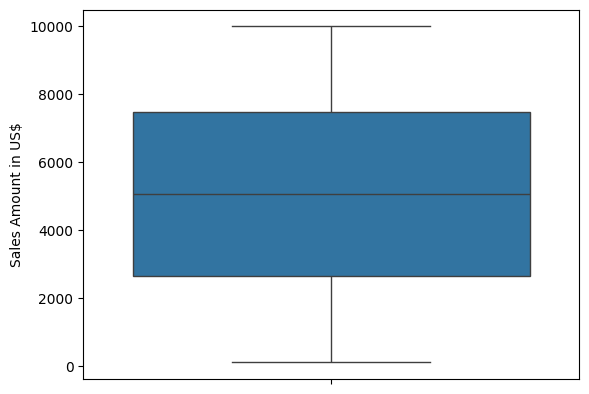

In [45]:
sns.boxplot(Sales_df['Sales Amount in US$']) #visually checking for outliner using  boxplot


<Axes: ylabel='Units Sold'>

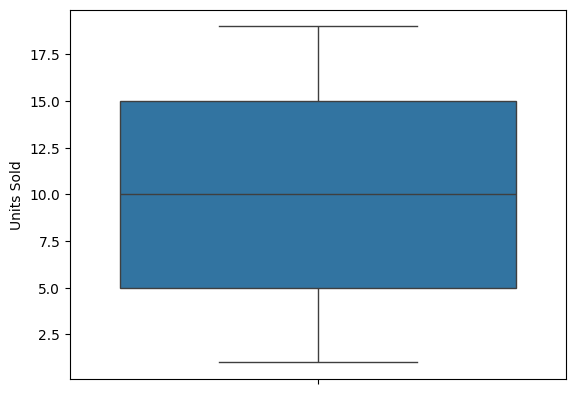

In [46]:
sns.boxplot(Sales_df['Units Sold']) #visually checking for outliner using  boxplot


<Axes: ylabel='Marketing Spend in US$'>

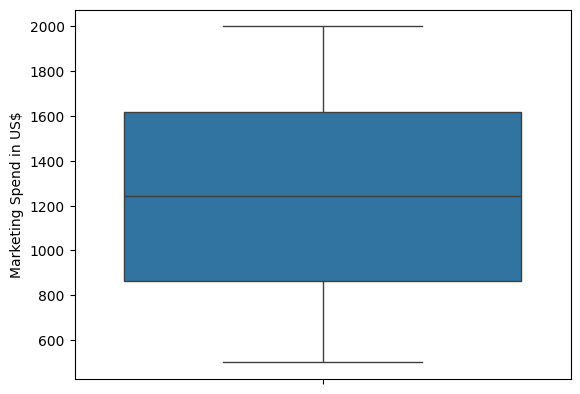

In [47]:
sns.boxplot(Sales_df['Marketing Spend in US$']) #visually checking for outliner using  boxplot

In [48]:
Sales_df['Units Sold'] = Sales_df['Units Sold'].astype(int)  # coverted data in 'Units Sold' column from 'float' to 'int'.



> # **So to summarise: **




*   We have cleaned NaN /Null values
*   Checked/Droped duplicates
*   Checked/Droped Outliner with boxplot (seaboarn)
*   Data type check





# ***We now create any additional columns we might need to understand data.***

In [49]:
Sales_df['Year_of_Sale'] = pd.DatetimeIndex(Sales_df['Date of Sale']).year # created new column with sales year based on give 'date of sale' column
Sales_df['Month_of_Sale'] = pd.DatetimeIndex(Sales_df['Date of Sale']).month # created new column with sales month based on give 'date of sale' column
Sales_df['Profit'] = Sales_df['Sales Amount in US$']-Sales_df['Marketing Spend in US$'] # created new column with profit based on sales and marketing spend




# **# Exploratory Data Analysis:**

In [50]:
Sales_df #view preped data

,Date of Sale,Region,Product Type,Sales Channel,Customer Type,Sales Amount in US$,Units Sold,Marketing Spend in US$,Returning Customer,Year_of_Sale,Month_of_Sale,Profit
0,01-01-2022,South America,CRM,Partner,Business,7723.0,16,793.0,Yes,2022,1,6930.0
1,02-01-2022,Australia,DevTools,Partner,Consumer,8681.0,15,725.0,Yes,2022,2,7956.0
2,03-01-2022,Asia,DevTools,Partner,Consumer,5240.0,8,587.0,No,2022,3,4653.0
3,04-01-2022,Australia,Database,Partner,Business,9933.0,15,1810.0,Yes,2022,4,8123.0
4,05-01-2022,Australia,CRM,Online,Consumer,215.0,1,933.0,Yes,2022,5,-718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3645,27-12-2022,Europe,ERP,Direct Sales,Consumer,5389.0,12,807.0,Yes,2022,12,4582.0
3646,28-12-2022,Asia,Database,Partner,Business,3083.0,10,1874.0,Yes,2022,12,1209.0
3647,29-12-2022,Asia,Antivirus,Direct Sales,Business,2921.0,16,1885.0,No,2022,12,1036.0
3648,30-12-2022,Australia,ERP,Partner,Business,3958.0,3,719.0,Yes,2022,12,3239.0


In [51]:
region_sales = Sales_df.groupby('Region')[['Sales Amount in US$', 'Units Sold', 'Marketing Spend in US$']].sum()
region_sales

,Sales Amount in US$,Units Sold,Marketing Spend in US$
Region,,,
Asia,3467674.0,6824,876357.0
Australia,3886579.0,7390,926639.0
Europe,3502484.0,7379,874655.0
North America,3745304.0,7235,923223.0
South America,3852670.0,7747,934673.0


In [52]:
region_most_sold_product = Sales_df.groupby(['Region', 'Product Type']).agg({'Sales Amount in US$':sum, 'Product Type':'count'})

In [53]:
product_most_marketed = Sales_df.groupby(['Product Type']).agg({'Marketing Spend in US$':sum ,'Product Type':'count'}).sort_values(by='Marketing Spend in US$', ascending=False)
product_most_marketed

,Marketing Spend in US$,Product Type
Product Type,,
CRM,943528.0,762
DevTools,912256.0,746
Database,911167.0,717
Antivirus,890603.0,712
ERP,877993.0,713


In [54]:
product_least_marketed = Sales_df.groupby(['Product Type']).agg({'Marketing Spend in US$':sum ,'Product Type':'count'}).sort_values(by='Marketing Spend in US$', ascending=True)
product_least_marketed

,Marketing Spend in US$,Product Type
Product Type,,
ERP,877993.0,713
Antivirus,890603.0,712
Database,911167.0,717
DevTools,912256.0,746
CRM,943528.0,762


In [55]:
product_purchase_prefered_channel = Sales_df.groupby(['Region','Customer Type','Product Type','Sales Channel'])[['Sales Channel']].count()
product_purchase_prefered_channel

Sales Channel
Region        Customer Type Product Type Sales Channel               
Asia          Business      Antivirus    Direct Sales              32
                                         Online                    19
                                         Partner                   22
                            CRM          Direct Sales              20
                                         Online                    22
...                                                               ...
South America Consumer      DevTools     Online                    21
                                         Partner                   27
                            ERP          Direct Sales              18
                                         Online                    19
                                         Partner                   29

[150 rows x 1 columns]

In [56]:
most_product_profit= Sales_df.groupby(['Product Type'])[['Sales Amount in US$','Marketing Spend in US$','Profit']].sum().sort_values(by='Profit', ascending = False)
most_product_profit


,Sales Amount in US$,Marketing Spend in US$,Profit
Product Type,,,
DevTools,3882224.0,912256.0,2969968.0
CRM,3805885.0,943528.0,2862357.0
Antivirus,3649972.0,890603.0,2759369.0
Database,3659801.0,911167.0,2748634.0
ERP,3456829.0,877993.0,2578836.0


In [57]:
month_wise_Sales = Sales_df.groupby(['Month_of_Sale'])[['Profit','Sales Amount in US$','Marketing Spend in US$']].sum().sort_values(by='Profit', ascending = False)
month_wise_Sales

,Profit,Sales Amount in US$,Marketing Spend in US$
Month_of_Sale,,,
4,1234999.0,1606170.0,371171.0
10,1208820.0,1593906.0,385086.0
3,1197128.0,1571080.0,373952.0
11,1187945.0,1560956.0,373011.0
1,1183067.0,1572192.0,389125.0
12,1181986.0,1573988.0,392002.0
5,1176701.0,1561375.0,384674.0
7,1164246.0,1556948.0,392702.0
8,1161852.0,1547993.0,386141.0


# **So far, we have seen:**



```
`1.  region_sales: region wise total sales, number and units, spent of marketing

2.   region_most_sold_product:  region wise product performance_value_units

3.   region_product_salestotal:  region wise product performance

4.   product_most_marketed: 	Marketing Spend in US_$_sum, Product Type_count

5.   product_least_marketed: Marketing Spend in US$_sum, Product Type_count

6.   product_purchase_prefered_channel: Region	Customer Type,	Product Type,	Sales Channel, Sales Channel_used_count

7. most_product_profit: Product Type	,Sales Amount in US$	Marketing Spend in US$	Profit

8. month_wise_Sales: Month_of_Sale, Profit	Sales Amount in US$,	Marketing Spend in US$ italicised text
```







Now let's export this cleaned data in .csv formatt and plot graphs in Power BI.

In [57]:
Sales_df.to_csv('Sales_df_cleaned.csv')